In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score

from scipy import stats

from sklearn.preprocessing import Normalizer, StandardScaler

import xgboost as xgb

from statistics import mode

# 1. Import data

In [2]:
envirm_file = 'data/Environmental_Health_Hazard_Index.csv'
job_file = 'data/Jobs_Proximity_Index.csv'
labor_market_file = 'data/Labor_Market_Engagement_Index.csv'
poverty_file = 'data/Low_Poverty_Index.csv'
transport_cost_file = 'data/Low_Transportation_Cost_Index.csv'
school_file = 'data/School_Proficiency_Index.csv'
data_file = 'data/20092013_ACS_5Year_CHAS_Estimate_Data_by_County.csv'

In [3]:
soe_file = 'data/20092013_ACS_5Year_Socioeconomic_Estimate_Data_by_Tract.csv'

In [4]:
soe_data = pd.read_csv(soe_file)

In [5]:
envir_data = pd.read_csv(envirm_file)
job_data = pd.read_csv(job_file)
labor_data = pd.read_csv(labor_market_file)
poverty_data = pd.read_csv(poverty_file)
trans_data = pd.read_csv(transport_cost_file)
school_data = pd.read_csv(school_file)

In [6]:
merge_data = pd.merge(envir_data, labor_data[['CNTY_FIPS','TRACT','lbr_idx']], on = ['CNTY_FIPS','TRACT'])
merge_data = pd.merge(merge_data, trans_data[['CNTY_FIPS','TRACT','tcost_idx']], on = ['CNTY_FIPS','TRACT'])
merge_data = pd.merge(merge_data,poverty_data[['CNTY_FIPS','TRACT','pov_idx']], on = ['CNTY_FIPS','TRACT'])
merge_data = pd.merge(merge_data[['STATE_NAME','GEOID','lbr_idx','pov_idx','tcost_idx','haz_idx']], soe_data, on =['GEOID'])

In [7]:
merge_data_num = merge_data.select_dtypes(include = ['int64', 'float64'])
merge_data_num = merge_data_num.drop(['GEOID','OBJECTID',
       'STATE', 'COUNTY', 'TRACT', 'CNTY_FIPS', 'EACODE', 'Shape__Area', 'Shape__Length'],axis=1)

# 2. Exploratory Data Analysis

## 2.1 Summary Exploration

In [8]:
merge_data_num.describe()

,lbr_idx,pov_idx,tcost_idx,haz_idx,B08013EST1,B08013_AVG_TTW,B08303EST1,B08303_30MINUS_TTW,B08303_30MINUS_TTW_PCT,B08303_30TO59_TTW,...,B23006EST28,B23006EST28_PCT,B23006EST29,B23006EST29_PCT,B24021EST2,B24021EST17,B24021EST25,B24021EST28,B24021EST29,B24021EST32
count,73083.000000,72948.000000,73517.000000,53106.000000,72802.000000,73349.000000,73517.000000,73517.000000,73517.000000,73517.000000,...,73517.000000,73517.000000,73517.000000,73517.000000,72202.000000,19636.000000,28183.000000,70631.000000,61810.000000,42999.000000
mean,49.490046,49.475777,48.420175,49.500904,47148.879632,25.105135,1827.417958,1172.581906,64.406893,505.720595,...,25.940830,20.253771,95.958377,21.154315,58607.105246,43321.405021,26574.504772,36306.845153,43575.378078,46602.064885
std,28.871821,28.869194,29.459487,28.860817,29101.371719,7.207152,962.915595,665.818302,17.333917,397.997305,...,33.283448,23.248118,101.229663,18.977321,20549.967076,18162.105784,14339.055493,11380.939990,16405.037288,17091.508909
min,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5500.000000,4323.000000,2499.000000,2499.000000,2499.000000,2499.000000
25%,24.000000,24.000000,23.000000,25.000000,27005.000000,20.420000,1162.000000,704.000000,53.420000,224.000000,...,0.000000,0.000000,30.000000,7.030000,45313.000000,31875.000000,17917.000000,29500.000000,32237.000000,35313.000000
50%,49.000000,49.000000,48.000000,50.000000,41585.000000,24.540000,1702.000000,1071.000000,65.960000,415.000000,...,15.000000,12.450000,66.000000,15.190000,54375.000000,40474.500000,23750.000000,34508.000000,41705.000000,44483.000000
75%,75.000000,74.000000,74.000000,74.000000,60853.750000,29.200000,2347.000000,1528.000000,77.440000,686.000000,...,37.000000,30.360000,127.000000,29.960000,67570.500000,50833.000000,31544.000000,41300.000000,51974.000000,55114.000000
max,99.000000,99.000000,99.000000,99.000000,631440.000000,94.430000,19819.000000,17073.000000,100.000000,9329.000000,...,466.000000,100.000000,2912.000000,100.000000,250001.000000,250001.000000,250001.000000,250001.000000,250001.000000,250001.000000


## 2.2 Histogram

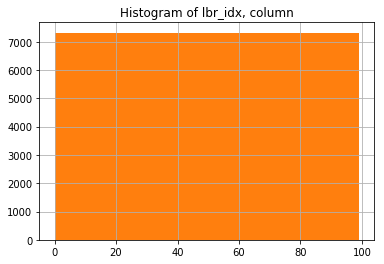

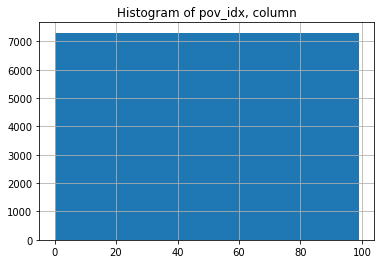

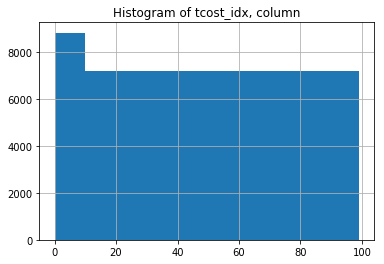

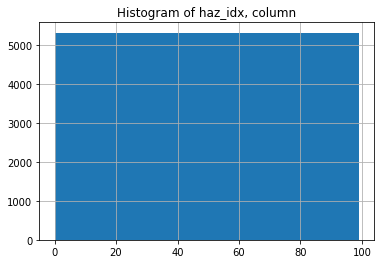

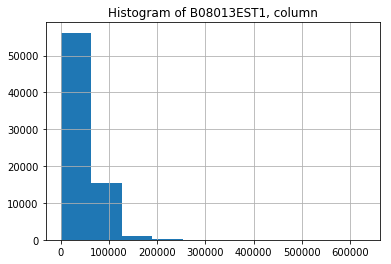

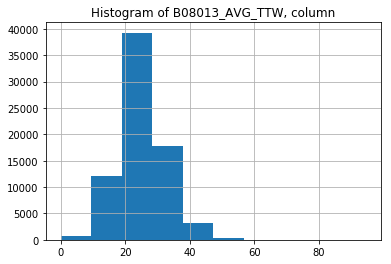

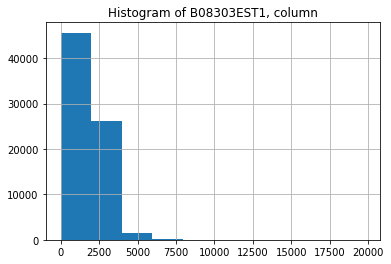

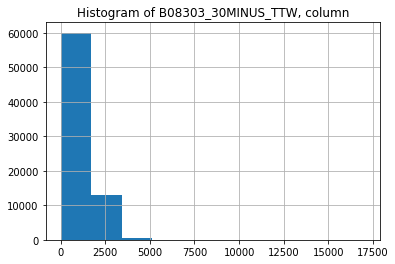

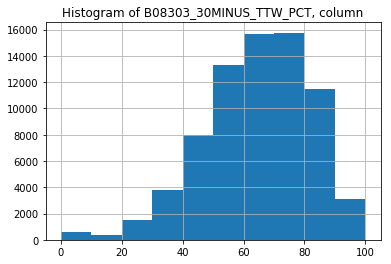

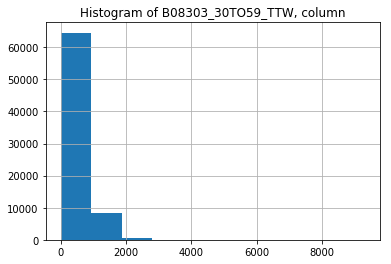

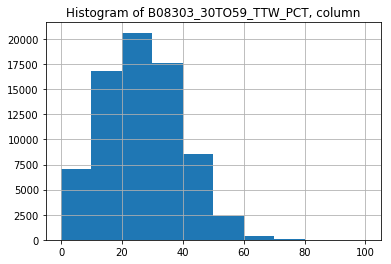

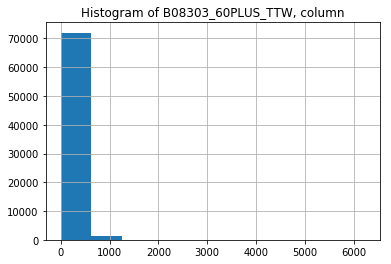

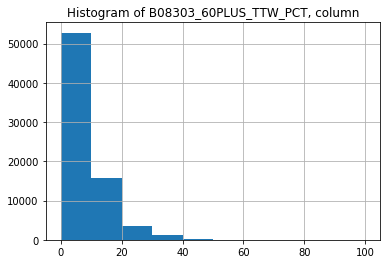

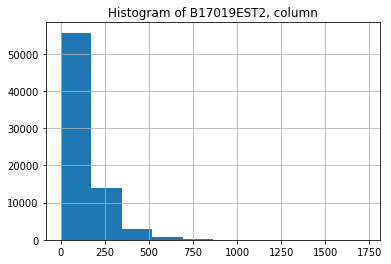

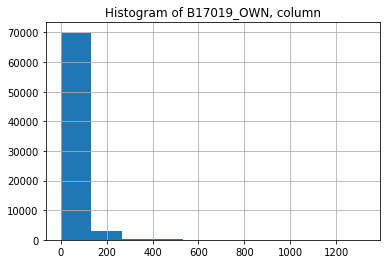

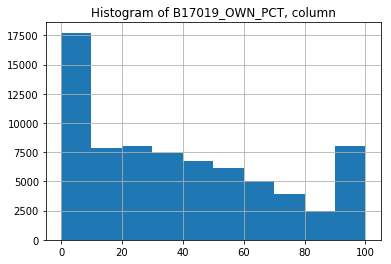

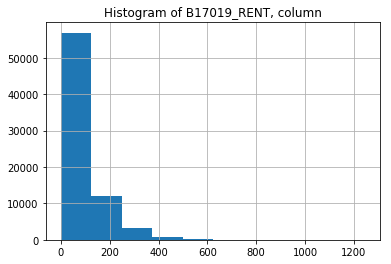

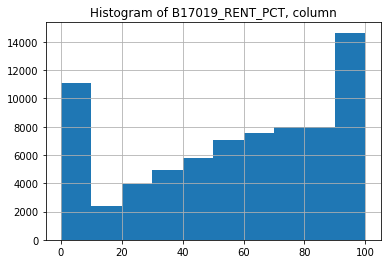

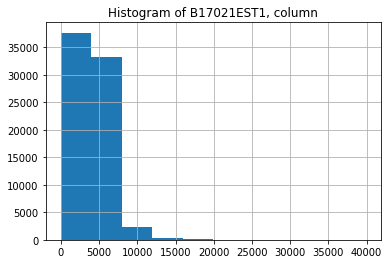

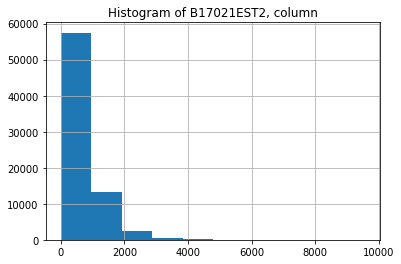

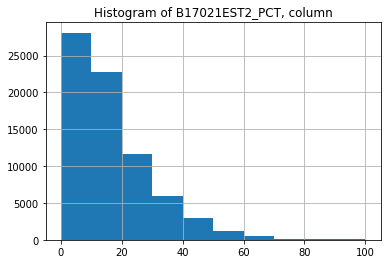

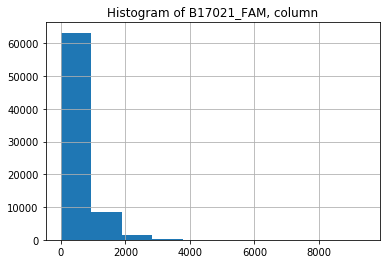

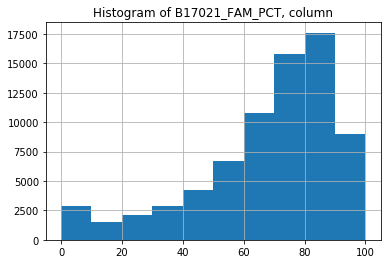

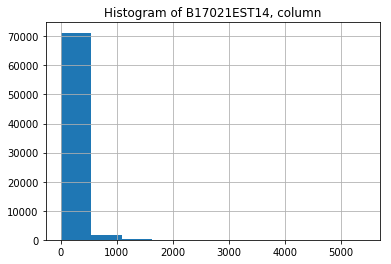

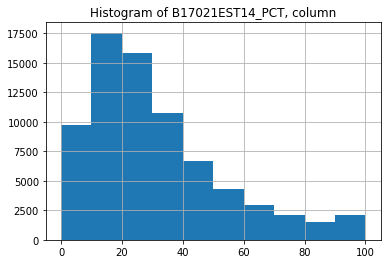

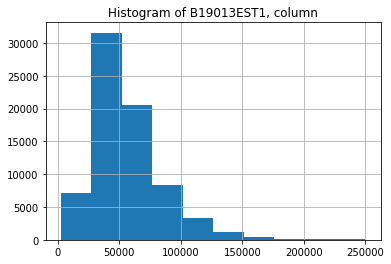

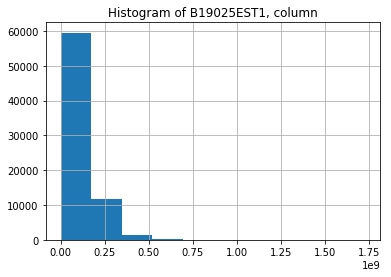

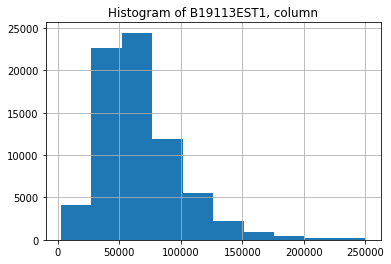

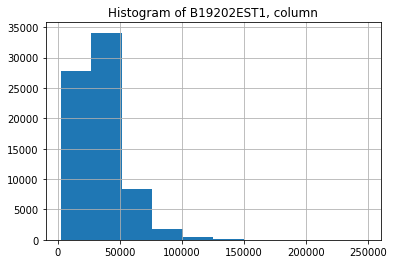

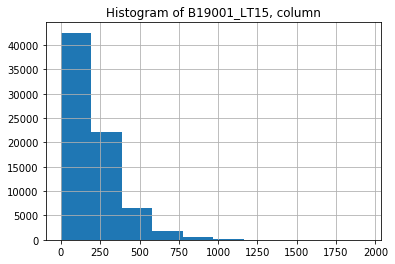

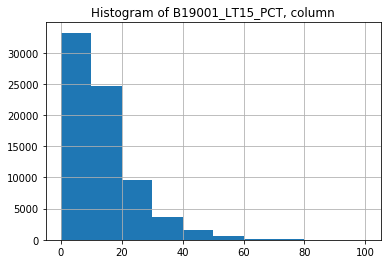

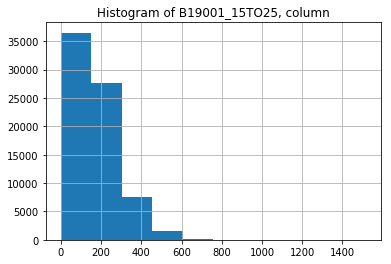

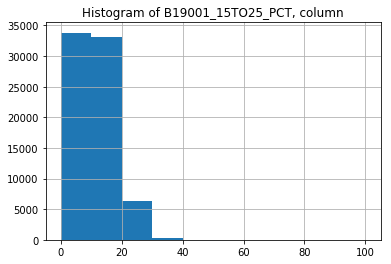

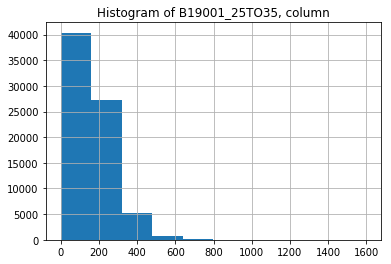

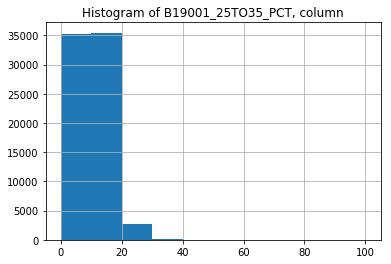

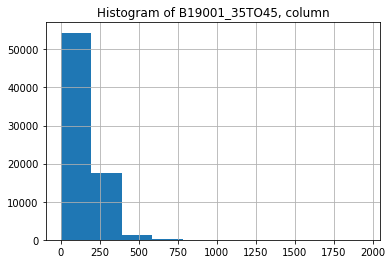

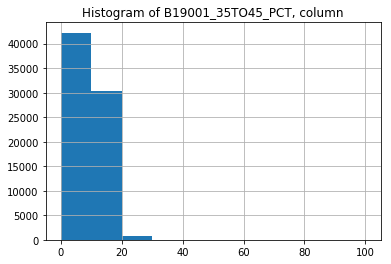

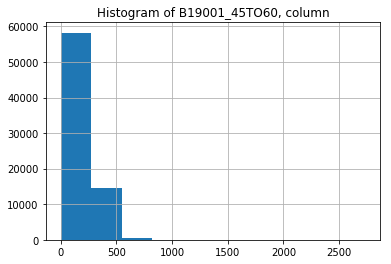

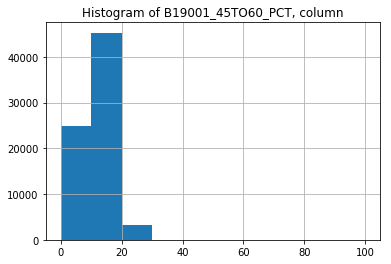

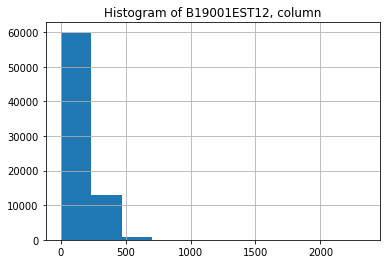

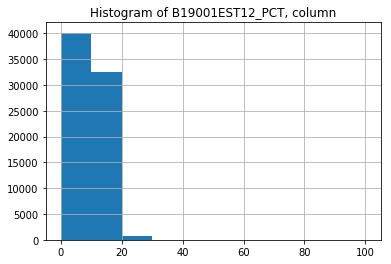

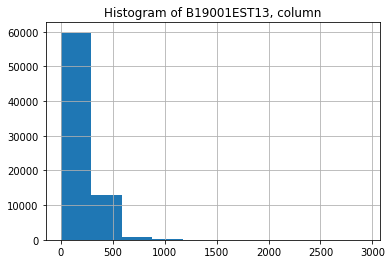

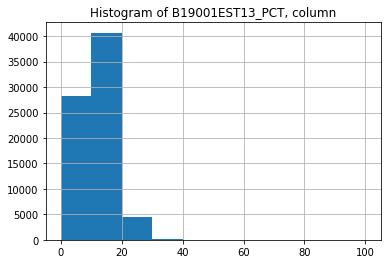

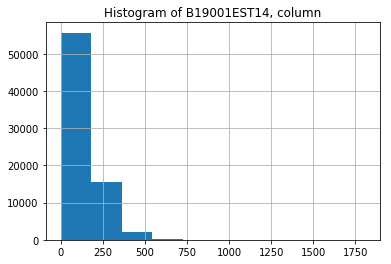

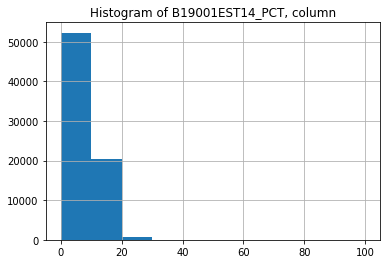

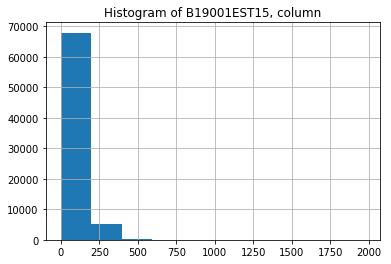

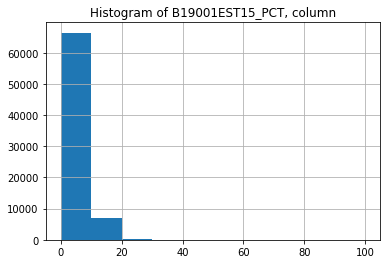

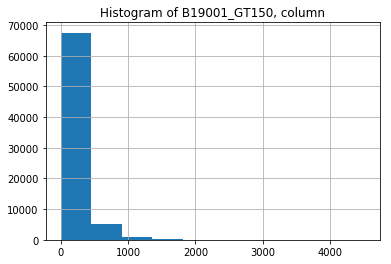

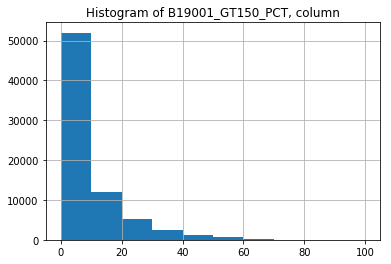

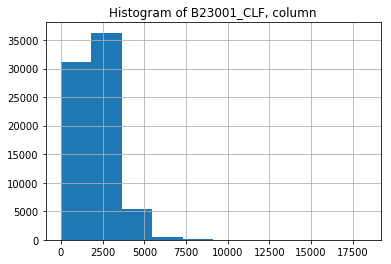

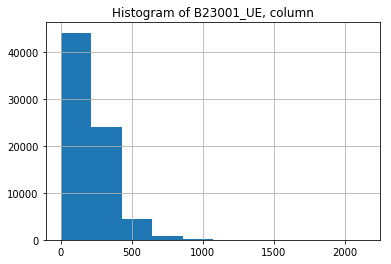

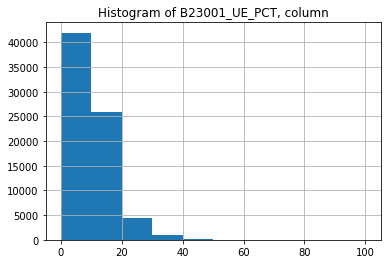

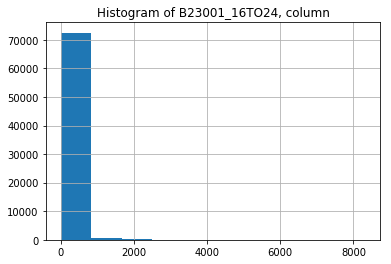

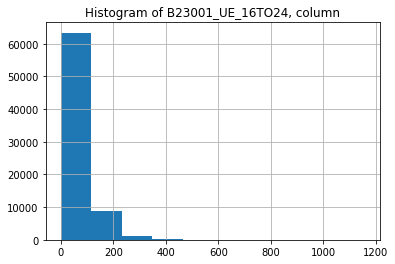

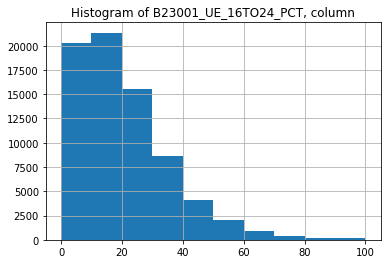

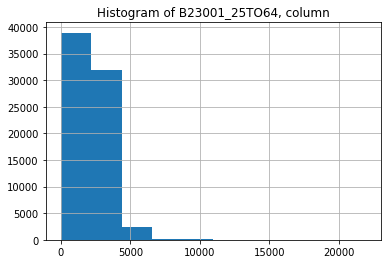

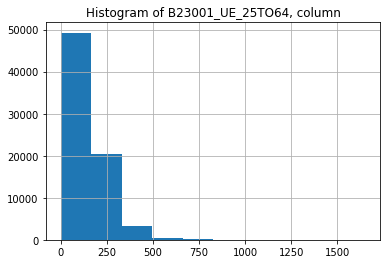

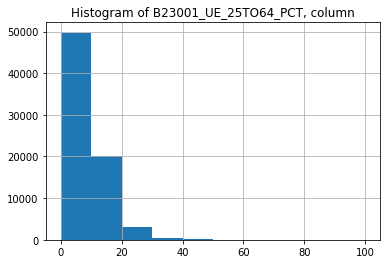

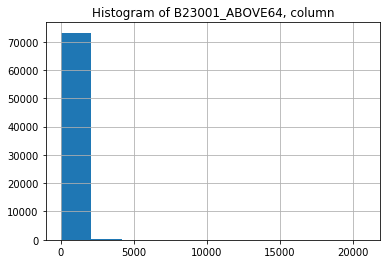

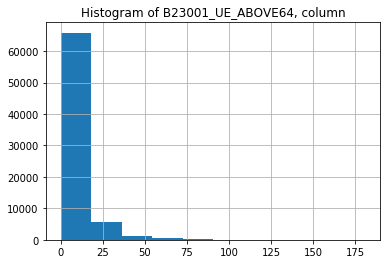

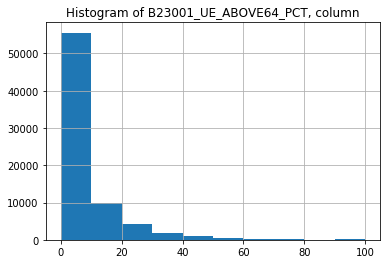

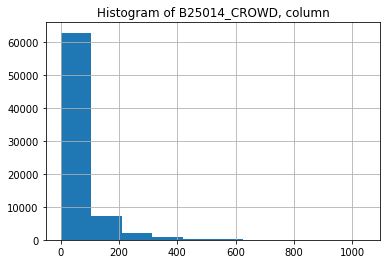

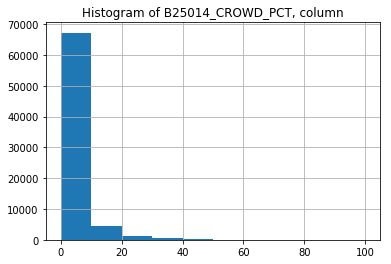

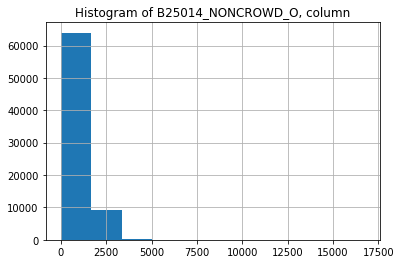

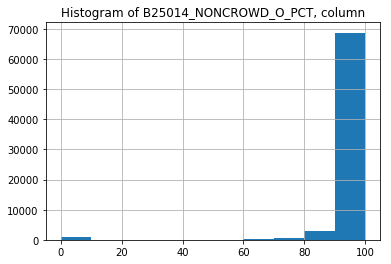

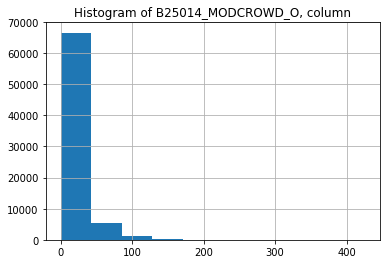

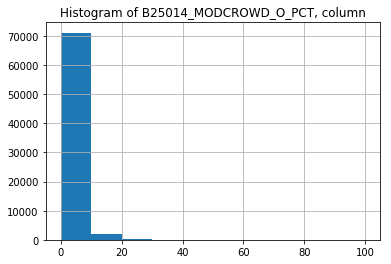

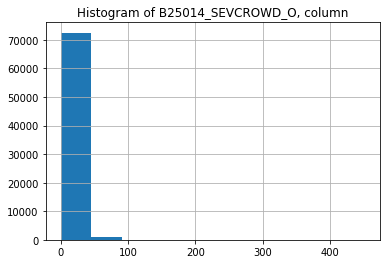

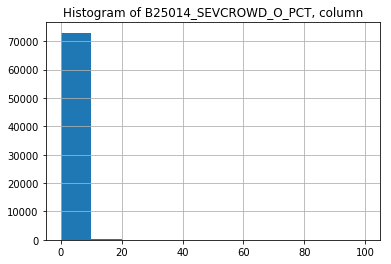

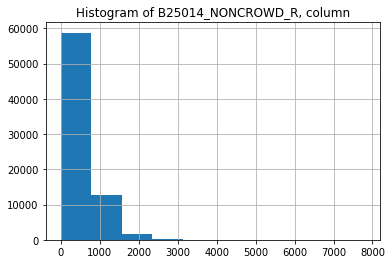

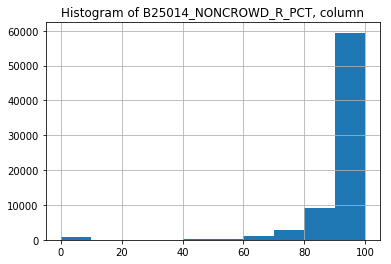

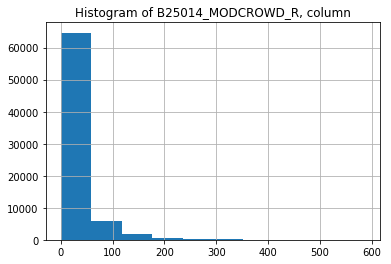

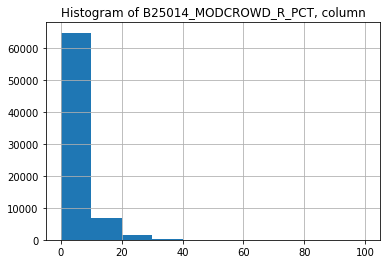

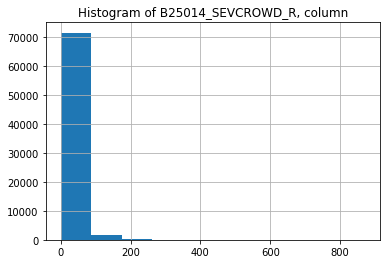

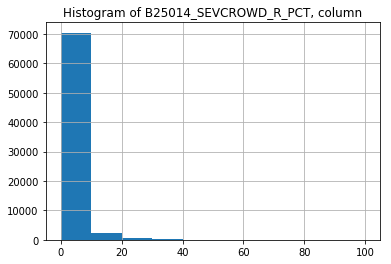

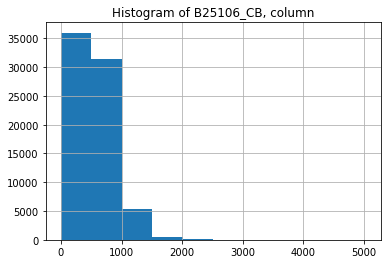

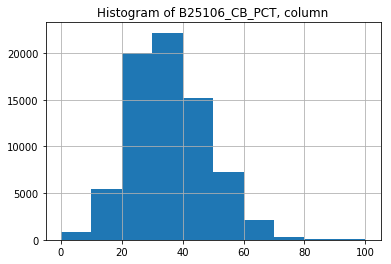

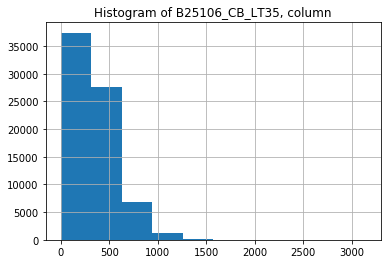

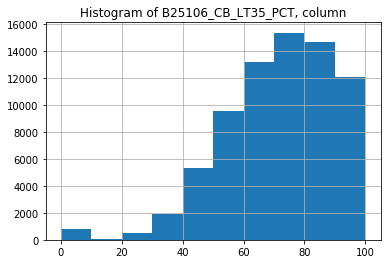

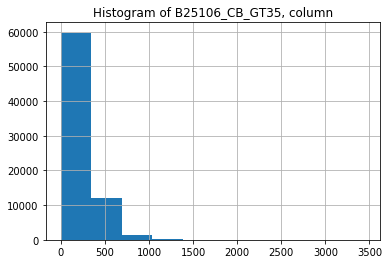

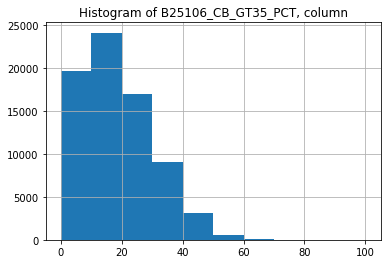

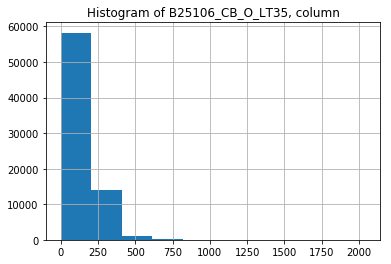

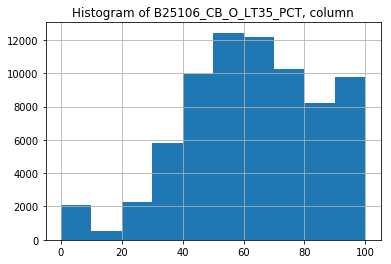

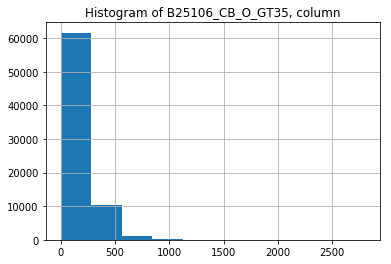

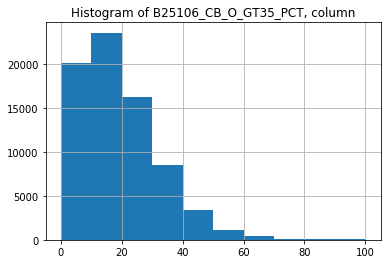

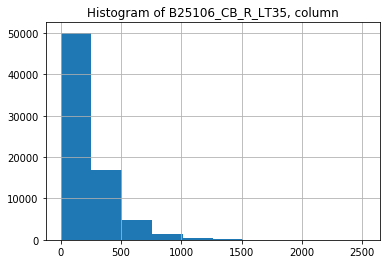

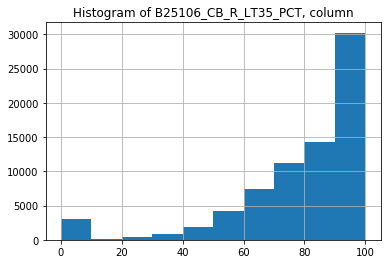

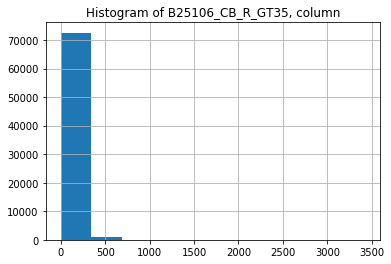

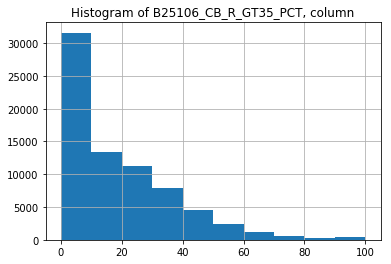

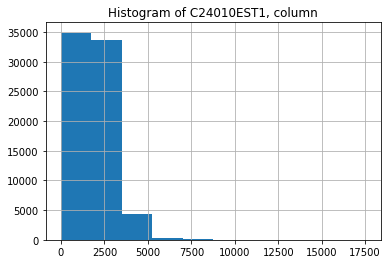

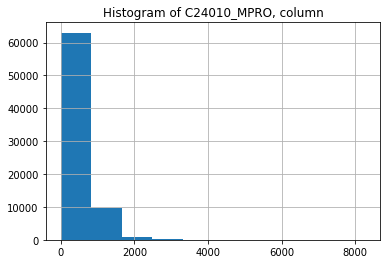

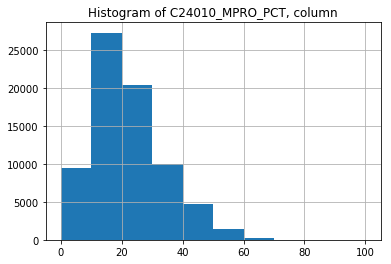

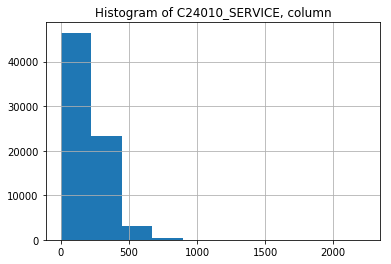

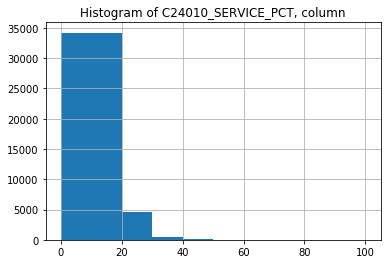

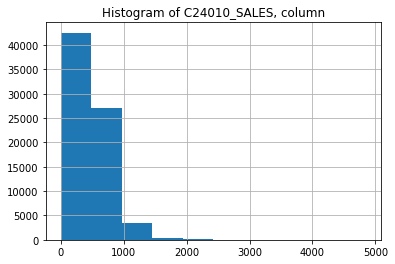

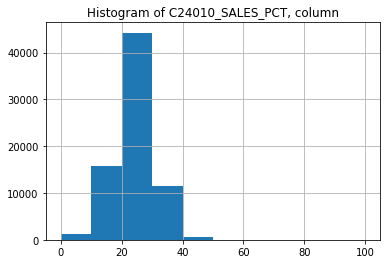

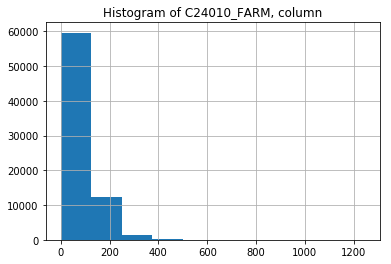

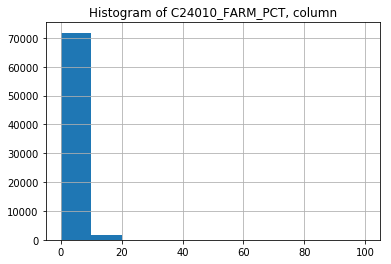

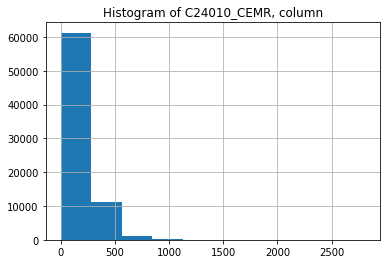

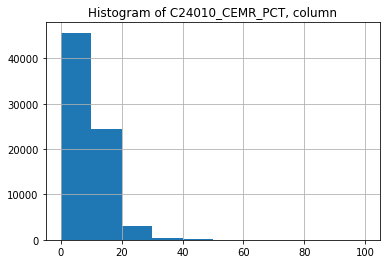

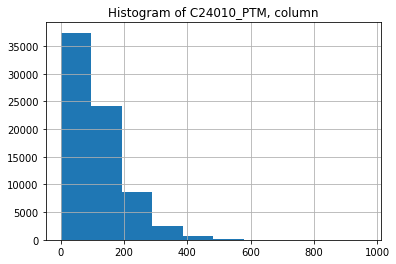

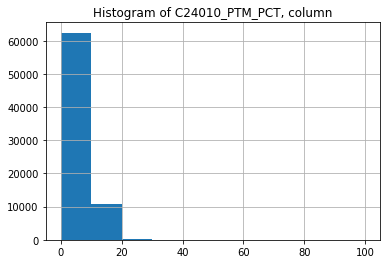

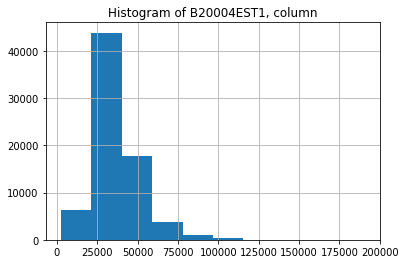

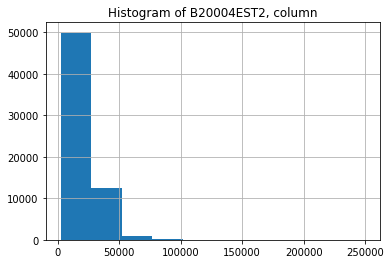

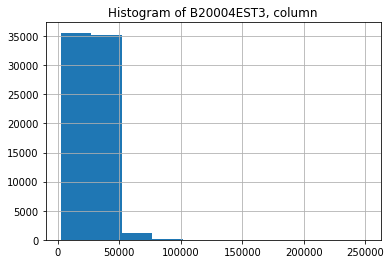

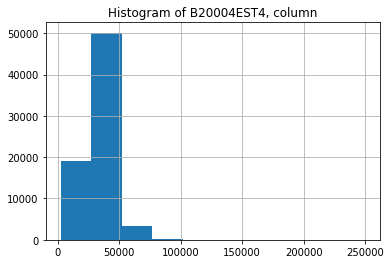

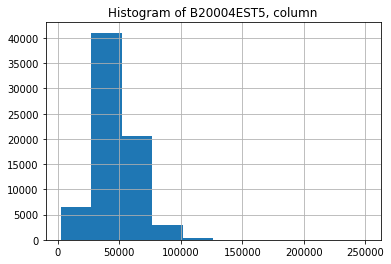

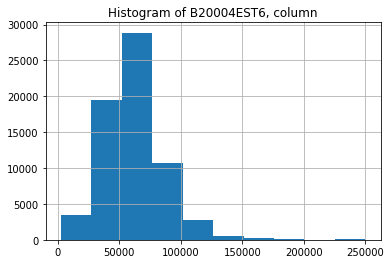

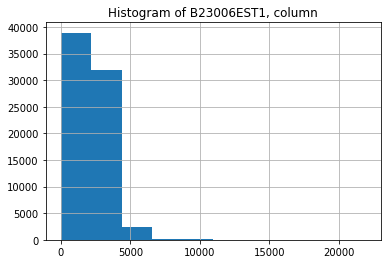

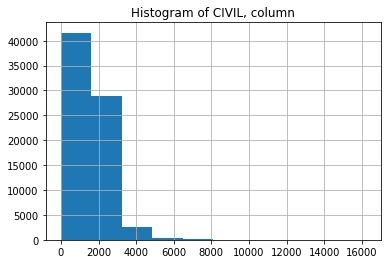

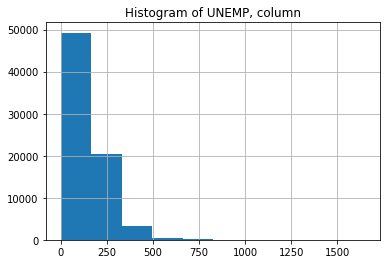

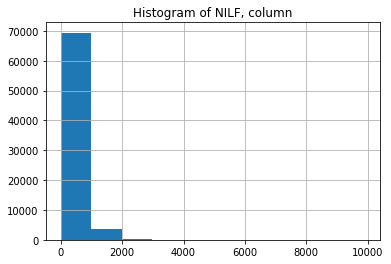

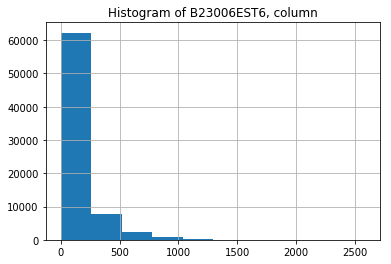

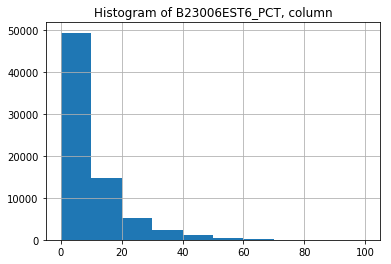

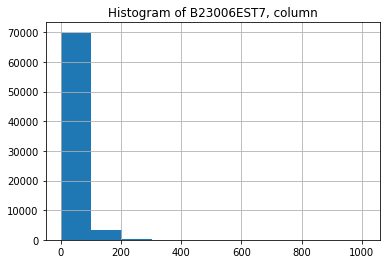

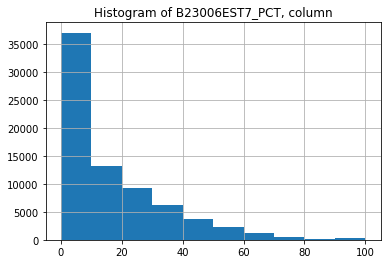

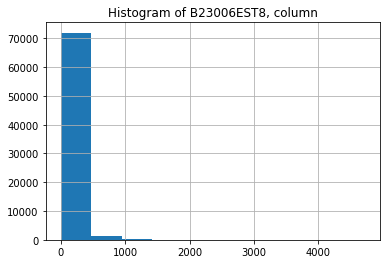

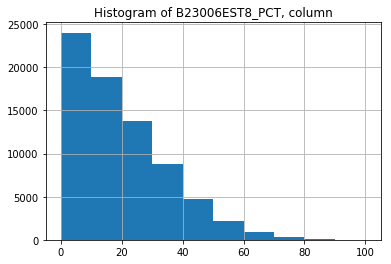

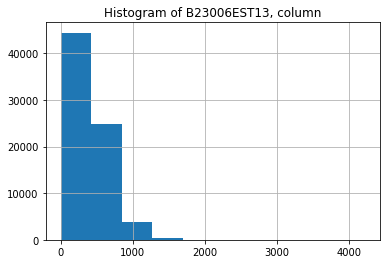

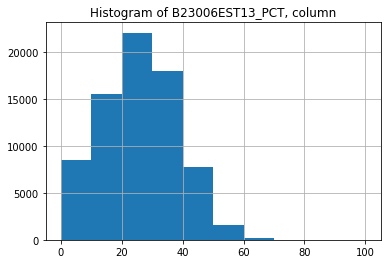

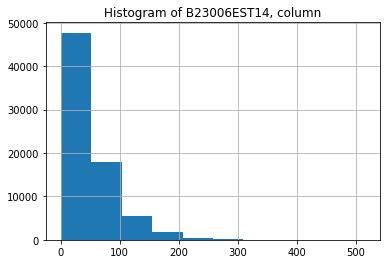

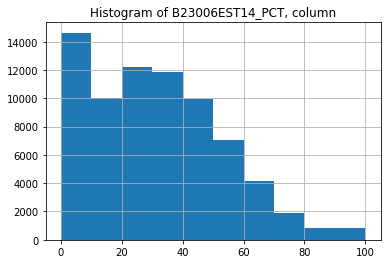

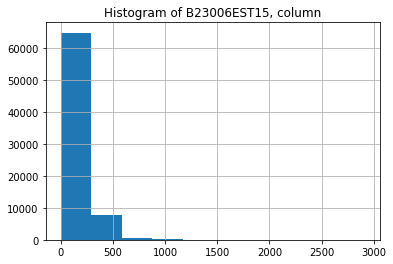

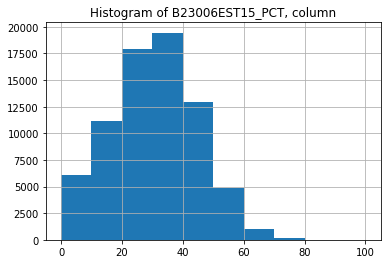

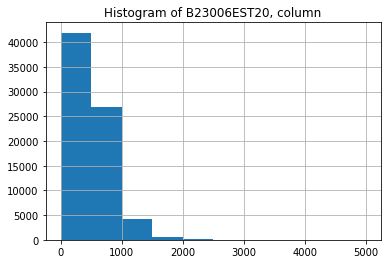

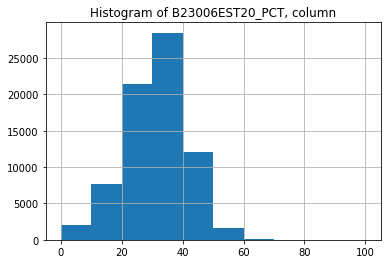

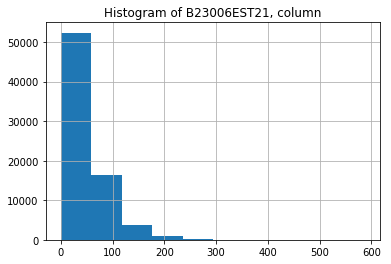

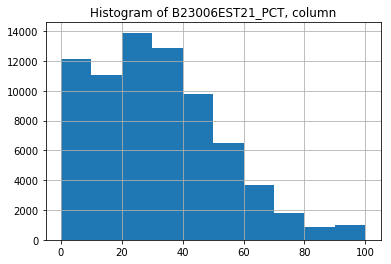

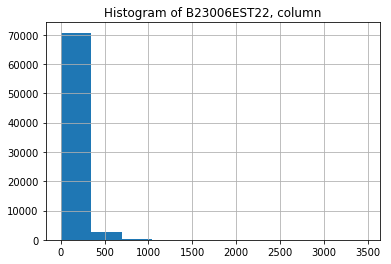

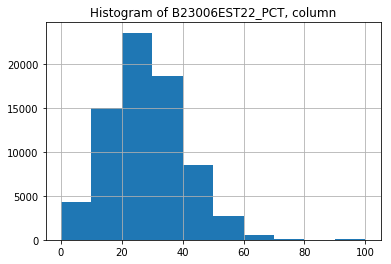

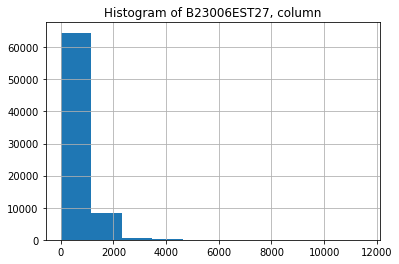

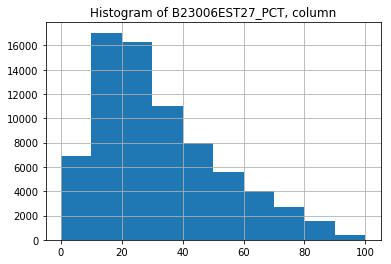

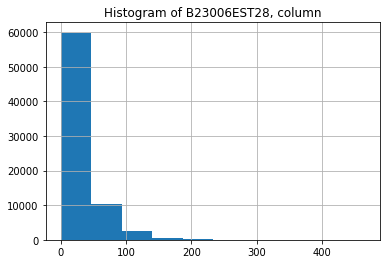

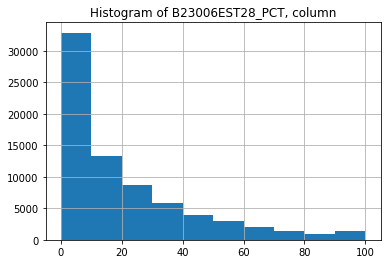

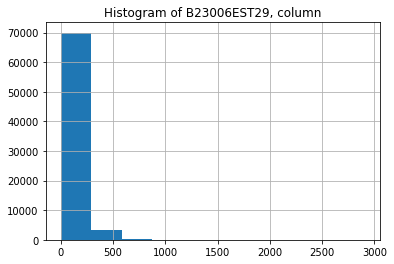

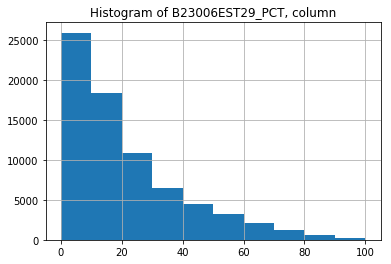

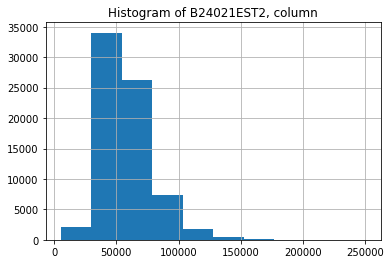

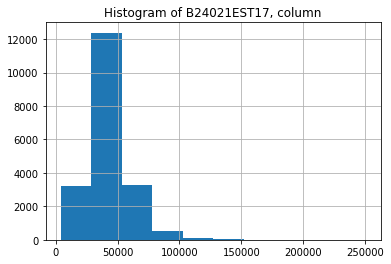

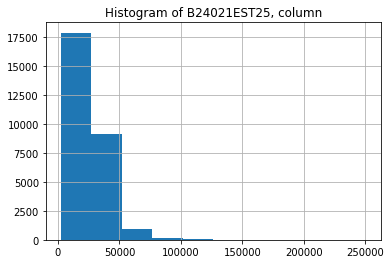

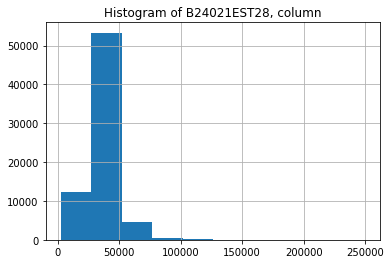

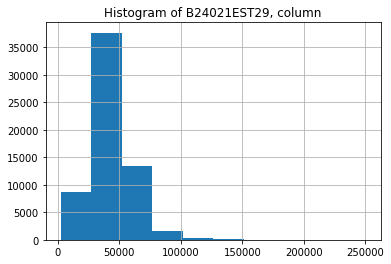

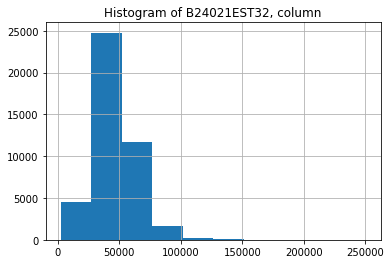

In [11]:
for column in merge_data_num.columns:

    merge_data_num[column].hist()
    plt.title('Histogram of %s, column' % column)

    plt.show()

# 3. Impute missing value

In [12]:
# select valid inputs with poverty index
merge_new_data = merge_data[merge_data.pov_idx.notnull()]

In [13]:
# train, validation set splitting
X, y = merge_new_data, merge_new_data.pov_idx

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# function to impute mean to missing value of validation set
def mean_encoding_test(test, train, col):
    mean_device_type = train[col].mean()
    test[col].fillna(mean_device_type, inplace=True)

In [15]:
# imputing the missing value

columns_list = [col for col in merge_new_data.columns[15:153]]
columns_list.extend(['lbr_idx', 'tcost_idx', 'haz_idx'])

for column in columns_list:
    
    mean_device_type = X_train[column].mean()
    # imputing the train set
    X_train[column].fillna(mean_device_type, inplace=True)
    
    # imputing the validation set
    mean_encoding_test(X_val, X_train, column)

/Users/shen/anaconda/envs/python36/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


# 4. Feature Engineering

In [16]:
X_train = X_train.replace(0, 0.001)
X_val = X_val.replace(0,0.001)

## 4.1 Box-cox transformation

In [17]:
column_list = [2, 3, 4, 5, 17, 18, 20, 22, 23, 24, 25, 27, 29, 30, 31, 32, 34, 35, 36, 37, \
               39, 40, 41, 42, 44, 46, 48, 50, 52, 54, 56, 57, 58, 59, 60, 61, 62, \
               63, 64, 65, 66, 67, 68, 69, 70,71, 72, 73,74, 76, 77, 78, 79,80, 82, 83, \
               84, 85, 86, 87, 88, 90, 91, 92, 94, 95, 96, 98, 99, 100, 101, 102, 103, \
               104, 105, 107,108,109, 110, 111, 112, 113, 114, 115, 116, 118, 119,120,121,\
               122,123,124, 125,126, 127,128, 129, 131, 132, 133,135,137, 138,139,140, \
               141, 142, 143,144,145,146, 147, 148,149,150,151, 152]

def box_cox_transform(columns,df, train, validation, df_columns):
    for column in columns:
        if df[df_columns[column]].min()> 0:
            xt, lambda_value = stats.boxcox(train[df_columns[column]])
            train[df_columns[column]] = xt
            xv = stats.boxcox(validation[df_columns[column]], lambda_value)
            validation[df_columns[column]] = xv
        
box_cox_transform(column_list, merge_new_data ,X_train, X_val, merge_new_data.columns)

## 4.2 Scaler and normalized

In [18]:
X_train_select = X_train.select_dtypes(include=['int64','float64']).drop(['pov_idx','B17019EST2', \
                                                                  'B17019_OWN', \
                                                                  'B17019_OWN_PCT', \
                                                                  'B17019_RENT', \
                                                                  'B17019_RENT_PCT', \
                                                                  'B17021EST1', \
                                                                  'B17021EST2', \
                                                                  'B17021EST2_PCT',\
                                                                  'B17021_FAM', \
                                                                  'B17021_FAM_PCT', \
                                                                  'B17021EST14',\
                                                                  'B17021EST14_PCT',\
                                                                  'Shape__Area', \
                                                                  'Shape__Length', \
                                                                  'GEOID',\
                                                                  'OBJECTID', 'STATE', \
                                                                  'COUNTY', 'TRACT',\
                                                                  'CNTY_FIPS', 'EACODE'],axis=1)

X_val_select = X_val.select_dtypes(include=['int64','float64']).drop(['pov_idx','B17019EST2', \
                                                                  'B17019_OWN', \
                                                                  'B17019_OWN_PCT', \
                                                                  'B17019_RENT', \
                                                                  'B17019_RENT_PCT', \
                                                                  'B17021EST1', \
                                                                  'B17021EST2', \
                                                                  'B17021EST2_PCT',\
                                                                  'B17021_FAM', \
                                                                  'B17021_FAM_PCT', \
                                                                  'B17021EST14',\
                                                                  'B17021EST14_PCT',\
                                                                  'Shape__Area', \
                                                                  'Shape__Length',\
                                                                  'GEOID',\
                                                                  'OBJECTID', 'STATE', \
                                                                  'COUNTY', 'TRACT',\
                                                                  'CNTY_FIPS', 'EACODE'],axis=1)


In [19]:
scaler = StandardScaler()
scaler.fit(X_train_select)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
X_train_new = scaler.transform(X_train_select)
X_val_new = scaler.transform(X_val_select)

In [21]:
normal = Normalizer()
normal.fit(X_train_select)

Normalizer(copy=True, norm='l2')

In [22]:
X_train_normal = normal.transform(X_train_select)
X_val_normal = normal.transform(X_val_select)

# 5. Modelling

In [97]:
"""
The dataset without any feature engineering
For comparsion
"""

merge_origin = merge_new_data.dropna()
X_origin, y_origin = merge_origin, merge_origin.pov_idx

X_train_origin, X_val_origin, y_train_origin, y_val_origin = train_test_split(X_origin, y_origin, test_size=0.2, random_state=42)


X_train_origin = X_train_origin.select_dtypes(include=['int64','float64']).drop(['pov_idx','B17019EST2', \
                                                                  'B17019_OWN', \
                                                                  'B17019_OWN_PCT', \
                                                                  'B17019_RENT', \
                                                                  'B17019_RENT_PCT', \
                                                                  'B17021EST1', \
                                                                  'B17021EST2', \
                                                                  'B17021EST2_PCT',\
                                                                  'B17021_FAM', \
                                                                  'B17021_FAM_PCT', \
                                                                  'B17021EST14',\
                                                                  'B17021EST14_PCT',\
                                                                  'Shape__Area', \
                                                                  'Shape__Length', \
                                                                  'GEOID',\
                                                                  'OBJECTID', 'STATE', \
                                                                  'COUNTY', 'TRACT',\
                                                                  'CNTY_FIPS', 'EACODE'],axis=1)

X_val_origin = X_val_origin.select_dtypes(include=['int64','float64']).drop(['pov_idx','B17019EST2', \
                                                                  'B17019_OWN', \
                                                                  'B17019_OWN_PCT', \
                                                                  'B17019_RENT', \
                                                                  'B17019_RENT_PCT', \
                                                                  'B17021EST1', \
                                                                  'B17021EST2', \
                                                                  'B17021EST2_PCT',\
                                                                  'B17021_FAM', \
                                                                  'B17021_FAM_PCT', \
                                                                  'B17021EST14',\
                                                                  'B17021EST14_PCT',\
                                                                  'Shape__Area', \
                                                                  'Shape__Length',\
                                                                  'GEOID',\
                                                                  'OBJECTID', 'STATE', \
                                                                  'COUNTY', 'TRACT',\
                                                                  'CNTY_FIPS', 'EACODE'],axis=1)


## 5.1 Random Forest

In [92]:
rf = RandomForestRegressor(random_state = 0, n_estimators= 10)

In [93]:
rf.fit(X_train_origin, y_train_origin)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [94]:
y_hat_rf = rf.predict(X_val_origin)

print ('r2 score of random forest model before transformation : %.4f'% r2_score(y_val_origin, y_hat_rf))


r2 score of random forest model before transformation : 0.7695


In [38]:
rf.fit(X_train_new, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
y_hat_rf = rf.predict(X_val_new)

In [40]:
print ('r2 score of random forest model after transformation : %.4f'% r2_score(y_val, y_hat_rf))

r2 score of random forest model after transformation : 0.8396


## 5.2 Gradient Boosting

In [45]:
bst = xgb.XGBRegressor(seed=42, n_estimators=60, learning_rate=0.1)

In [96]:
bst.fit(X_train_origin, y_train_origin)
y_hat_xgb = bst.predict(X_val_origin)
print ('r2 score of gradient boosting model before transformation : %.4f'% r2_score(y_val_origin, y_hat_xgb))

r2 score of gradient boosting model before transformation : 0.7941


In [46]:
bst.fit(X_train_new, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=60,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

In [47]:
y_hat_xgb = bst.predict(X_val_new)

In [49]:
print ('r2 score of gradient boosting model after transformation : %.4f'% r2_score(y_val, y_hat_xgb))

r2 score of gradient boosting model after transformation : 0.8467


# 6. Hyperparameter tuning on XGB

In [108]:
def n_estimator_xgb(X_train, X_val, y_train, y_val,numTrees):
    f_train_list = []
    f_val_list =[]
    f = 0
    
    #iterate through numTrees
    for numTree in numTrees:
        bst.set_params(n_estimators = numTree)
        bst.fit(X_train, y_train)
        Yhat_train =bst.predict(X_train)
        Yhat_val = bst.predict(X_val)
        
        #compute train and validation error
        f_train = r2_score(y_train, Yhat_train)
        
        f_val = r2_score(y_val, Yhat_val)
        
        f_train_list.append(f_train)
        f_val_list.append(f_val)
        
        #find the best numTree with the largest f.5
        if f_val > f:
            num = numTree
            best_f_train = f_train
            best_f_val = f_val
            f = f_val
            
            
    return num, f_train_list, f_val_list, best_f_train, best_f_val
        
numTrees = range(10,100,10)
numTree_bst, f_train_list_bst_numTree, f_val_list_bst_numTree, \
f_train_bst_numTree, f_val_bst_numTree = \
n_estimator_xgb(X_train_new, X_val_new, y_train, y_val,numTrees)

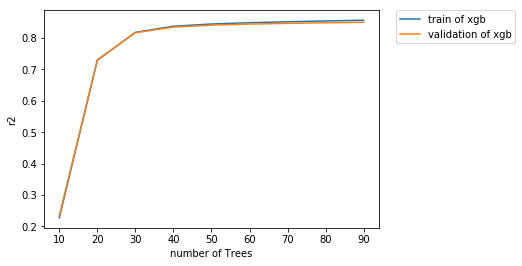

In [109]:
plt.plot(range(10,100,10), f_train_list_bst_numTree,label="train of xgb")
plt.plot(range(10,100,10), f_val_list_bst_numTree,label="validation of xgb")

plt.xlabel('number of Trees')
plt.ylabel('r2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [115]:
max_depths =range(8,12)

def max_dep_xgb(X_train, X_val, y_train, y_val,max_depths):
    f_train_list = []
    f_val_list =[]
    f = 0
    
    #iterate through max depth values
    for depth in max_depths:
        bst.set_params(n_estimators = 50,max_depth=depth)
        bst.fit(X_train, y_train)
        Yhat_train = bst.predict(X_train)
        Yhat_val = bst.predict(X_val)
        
        #compute train and validation error
        f_train = r2_score(y_train, Yhat_train)
        
        f_val = r2_score(y_val, Yhat_val)
        
        f_train_list.append(f_train)
        f_val_list.append(f_val)
        
        #find the best numTree with the largest f.5
        if f_val > f:
            num = depth
            best_f_train = f_train
            best_f_val = f_val
            f = f_val
    return num, f_train_list, f_val_list, best_f_train, best_f_val
        
depth_xgb, f_train_list_xgb_depth, f_val_list_xgb_depth, \
f_train_xgb_depth, f_val_xgb_depth = \
max_dep_xgb(X_train_new, X_val_new, y_train, y_val,max_depths)

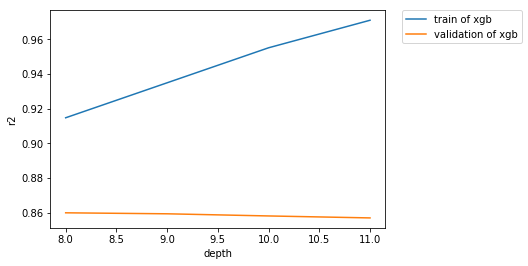

In [116]:
plt.plot(max_depths, f_train_list_xgb_depth,label="train of xgb")
plt.plot(max_depths, f_val_list_xgb_depth,label="validation of xgb")

plt.xlabel('depth')
plt.ylabel('r2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [122]:
learning_rates =np.arange(.05,.11,.01)

def rate_xgb(X_train, X_val, y_train, y_val,learning_rate):
    f_train_list = []
    f_val_list =[]
    f = 0
    
    #iterate through max depth values
    for rate in learning_rate:
        bst.set_params(n_estimators = 50,max_depth=8, learning_rate = rate)
        bst.fit(X_train, y_train)
        Yhat_train = bst.predict(X_train)
        Yhat_val = bst.predict(X_val)
        
        #compute train and validation error
        f_train = r2_score(y_train, Yhat_train)
        
        f_val = r2_score(y_val, Yhat_val)
        
        f_train_list.append(f_train)
        f_val_list.append(f_val)
        
        #find the best numTree with the largest f.5
        if f_val > f:
            num = rate
            best_f_train = f_train
            best_f_val = f_val
            f = f_val
    return num, f_train_list, f_val_list, best_f_train, best_f_val
        
rate_xgb, f_train_list_xgb_rate, f_val_list_xgb_rate, \
f_train_xgb_rate, f_val_xgb_rate = \
rate_xgb(X_train_new, X_val_new, y_train, y_val,learning_rates)

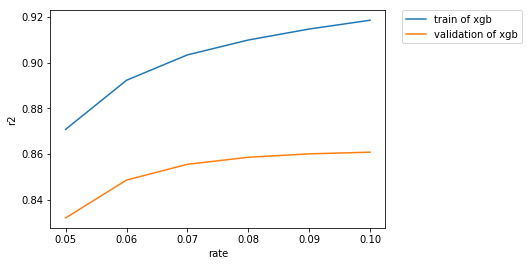

In [123]:
plt.plot(learning_rates, f_train_list_xgb_rate,label="train of xgb")
plt.plot(learning_rates, f_val_list_xgb_rate,label="validation of xgb")

plt.xlabel('rate')
plt.ylabel('r2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 7. Cross-validation

In [99]:
train_x_df = pd.DataFrame(data = X_train_new)
train_y_df = pd.DataFrame(data = y_train)
val_x_df = pd.DataFrame(data = X_val_new)
val_y_df = pd.DataFrame(data = y_val)

In [100]:
def cross_validate_xgb(Xtrain, ytrain, splits, bst):
    r2 = []
    
    kf = KFold(n_splits=splits, random_state=42)
    
    for tr_index, val_index in kf.split(Xtrain, ytrain):
        # split k folds
        x_tr, x_val = Xtrain.iloc[tr_index], Xtrain.iloc[val_index]
        y_tr, y_val = ytrain.iloc[tr_index], ytrain.iloc[val_index]
        
        # fit model
        bst.fit(x_tr, y_tr)
        y_hat = bst.predict(x_val)
        r2_sc = r2_score(y_val, y_hat)
        r2.append(r2_sc)
        
    return np.mean(r2)

In [101]:
r2_cross_validate = cross_validate_xgb(train_x_df, train_y_df, 5, bst)

In [102]:
print ('mean r2 score from 5-fold cross-validating: %.2f' % r2_cross_validate)

mean r2 score from 5-fold cross-validating: 0.85


# 8. Important Features

In [185]:
col_name = 'data/DD_2009-2013_ACS_5-Year_Socioeconomic_Estimate_Data_by_Tract.xlsx'
col_name_df = pd.read_excel(col_name)

In [186]:
for i in range(len(col_name_df)):
    if col_name_df['Column Description'][i] == '\xa0 \xa0 as a %\xa0 ':
        col_name_df['Column Description'][i] = col_name_df['Column Description'][i-1] + ' as a %'

In [187]:
feat_df = pd.DataFrame({'cols':X_train_select.columns, 'imp':bst.feature_importances_})

In [189]:
feature_df = pd.merge(feat_df, col_name_df, left_on='cols', right_on='Column Name', how = 'left')

In [190]:
feature_df['Column Description'][0:3] = ['Labour Index', 'Transport Index', 'Hazard Index']

feature_df = feature_df.drop(['Column Name'],axis=1)
feature_df = feature_df.dropna()

/Users/shen/anaconda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


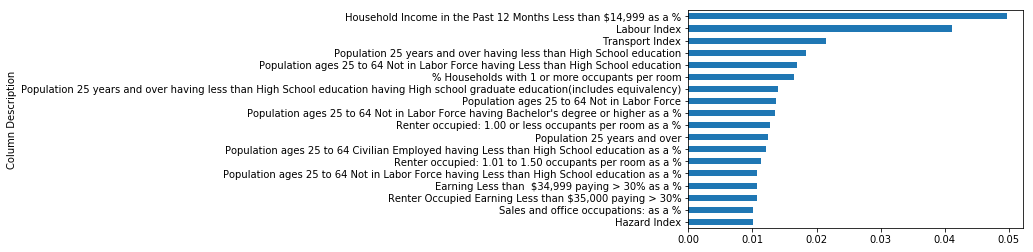

In [194]:
feature_df.sort_values(by='imp',ascending=True, inplace=True)
feature_df[feature_df.imp>0.01].plot('Column Description','imp', 'barh', legend=False)
plt.show()